In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wegodf = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wegodf.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [4]:
wegodf['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

In [5]:
wegodf[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


In [6]:
wegodf['SCHEDULED_TIME'] = pd.to_datetime(wegodf['SCHEDULED_TIME'])

In [7]:
wegodf['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wegodf['ACTUAL_DEPARTURE_TIME'])

In [8]:
wegodf['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wegodf['ACTUAL_ARRIVAL_TIME'])

In [9]:
#useful for iterating over every column and seeing a sample of the unique values within each column:

for series_name, series in wegodf.items():
    print(series_name)
    print(wegodf[series_name].unique())

CALENDAR_ID
[120230801 120230802 120230803 120230804 120230805 120230806 120230807
 120230808 120230809 120230810 120230811 120230812 120230813 120230814
 120230815 120230816 120230817 120230818 120230819 120230820 120230821
 120230822 120230823 120230824 120230825 120230826 120230827 120230828
 120230829 120230830 120230831 120230901 120230902 120230903 120230904
 120230905 120230906 120230907 120230908 120230909 120230910 120230911
 120230912 120230913 120230914 120230915 120230916 120230917 120230918
 120230919 120230920 120230921 120230922 120230923 120230924 120230925
 120230926 120230927 120230928 120230929 120230930]
SERVICE_ABBR
[1 2 3]
ADHERENCE_ID
[ 99457890  99457891  99457892 ... 100406612 100406613 100406614]
DATE
['2023-08-01' '2023-08-02' '2023-08-03' '2023-08-04' '2023-08-05'
 '2023-08-06' '2023-08-07' '2023-08-08' '2023-08-09' '2023-08-10'
 '2023-08-11' '2023-08-12' '2023-08-13' '2023-08-14' '2023-08-15'
 '2023-08-16' '2023-08-17' '2023-08-18' '2023-08-19' '2023-08-20'

## Q1  What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [10]:
wegodf.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [11]:
wegodf['PREV_SCHED_STOP_CANCELLED'].value_counts().sort_index()

PREV_SCHED_STOP_CANCELLED
0.0    275746
1.0      4254
Name: count, dtype: int64

In [12]:
wegodf[['ROUTE_ABBR', 'PREV_SCHED_STOP_CANCELLED']].groupby(['ROUTE_ABBR'])['PREV_SCHED_STOP_CANCELLED']\
                                                        .value_counts()\
                                                        .reset_index(name = 'sched_stop_count')\
                                                        .sort_values(['sched_stop_count'])

,ROUTE_ABBR,PREV_SCHED_STOP_CANCELLED,sched_stop_count
3,7,1.0,203
9,50,1.0,293
11,52,1.0,472
1,3,1.0,485
13,55,1.0,521
15,56,1.0,528
7,23,1.0,535
5,22,1.0,1217
2,7,0.0,11813
4,22,0.0,17106


In [13]:
#Removing rows with PREV_SCHED_STOP_CANCELLED equal to 1.0
no_sched_stop = wegodf.query('`PREV_SCHED_STOP_CANCELLED` == 1.0')
no_sched_stop = wegodf[~(wegodf['PREV_SCHED_STOP_CANCELLED'] ==1.0)] 
no_sched_stop

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


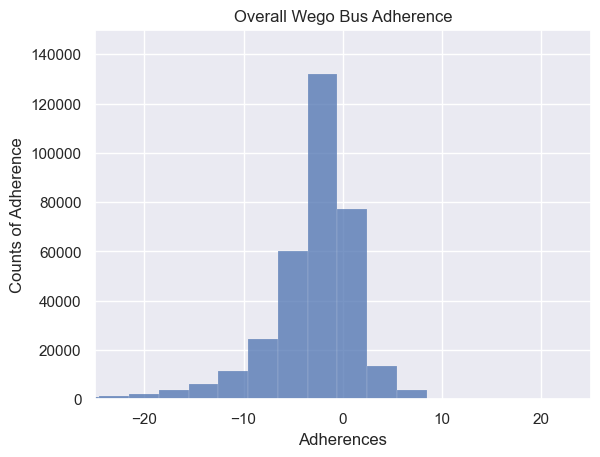

In [14]:
#Overall distribution of adherence
sns.set_theme(style="darkgrid")
sns.histplot(data=wegodf, x="ADHERENCE", binwidth=3)
plt.ylim(0, 150000)
plt.xlim(-25, 25)
plt.xlabel("Adherences")
plt.ylabel("Counts of Adherence")
plt.title("Overall Wego Bus Adherence")
plt.show()

C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


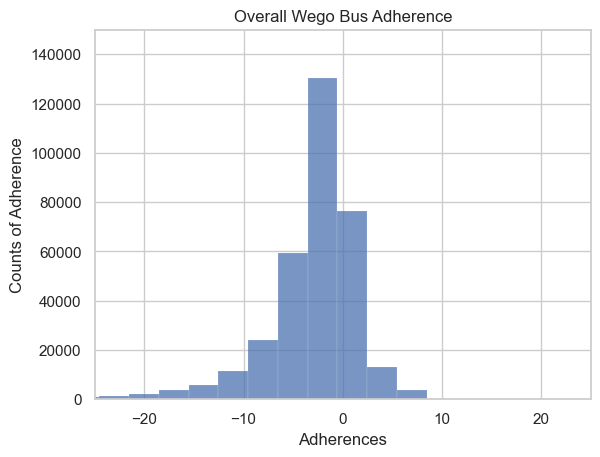

In [15]:
#Overall distribution of adherence with previously scheduled stops removed
sns.set_theme(style="whitegrid")
sns.histplot(data=no_sched_stop, x="ADHERENCE", binwidth=3)
plt.ylim(0, 150000)
plt.xlim(-25, 25)
plt.xlabel("Adherences")
plt.ylabel("Counts of Adherence")
plt.title("Overall Wego Bus Adherence")
plt.show()

C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


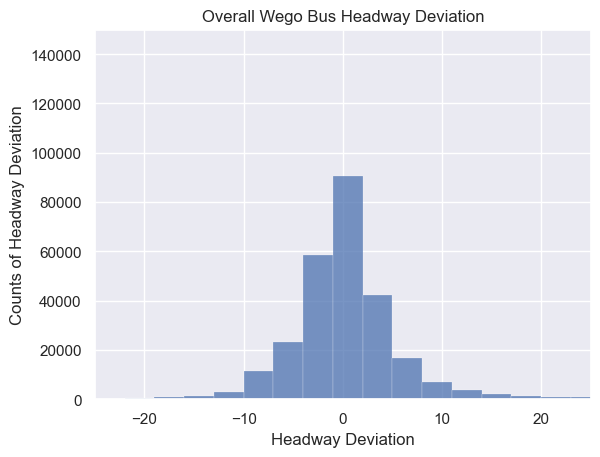

In [16]:
#Overall distribution of headway deviation
sns.set_theme(style="darkgrid")
sns.histplot(data=wegodf, x="HDWY_DEV", binwidth=3)
plt.ylim(0, 150000)
plt.xlim(-25, 25)
plt.xlabel("Headway Deviation")
plt.ylabel("Counts of Headway Deviation")
plt.title("Overall Wego Bus Headway Deviation")
plt.show()

C:\Users\mdalt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


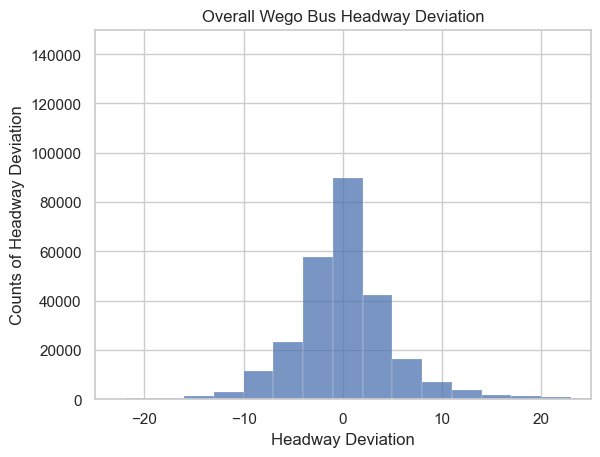

In [17]:
#Overall distribution of headway deviation with previously scheduled stops removed
sns.set_theme(style="whitegrid")
sns.histplot(data=no_sched_stop, x="HDWY_DEV", binwidth=3)
plt.ylim(0, 150000)
plt.xlim(-25, 25)
plt.xlabel("Headway Deviation")
plt.ylabel("Counts of Headway Deviation")
plt.title("Overall Wego Bus Headway Deviation")
plt.show()

## Q2. How does direction of travel, route, or location affect the headway and on-time performance?

In [18]:
wegodf[['ROUTE_ABBR', 'ADJUSTED_ONTIME_COUNT']].groupby(['ROUTE_ABBR'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ontime_count'])

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT,ontime_count
5,22,0,3467
3,7,0,4609
7,23,0,6971
9,50,0,6982
15,56,0,11659
1,3,0,12646
2,7,1,13417
11,52,0,14083
13,55,0,19864
4,22,1,22492


In [19]:
wegodf[['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'ADJUSTED_ONTIME_COUNT', 'HDWY_DEV']].groupby(['ROUTE_ABBR','ROUTE_DIRECTION_NAME','HDWY_DEV'])['ADJUSTED_ONTIME_COUNT']\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR','ontime_count'])

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,HDWY_DEV,ADJUSTED_ONTIME_COUNT,ontime_count
0,3,FROM DOWNTOWN,-33.600000,0,1
1,3,FROM DOWNTOWN,-33.366667,0,1
2,3,FROM DOWNTOWN,-33.216667,0,1
3,3,FROM DOWNTOWN,-32.783334,1,1
4,3,FROM DOWNTOWN,-30.233334,0,1
...,...,...,...,...,...
39649,56,FROM DOWNTOWN,-0.266667,1,63
42516,56,TO DOWNTOWN,0.000000,1,64
42520,56,TO DOWNTOWN,0.050000,1,66
42530,56,TO DOWNTOWN,0.166666,1,66


In [20]:
wegodf.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [21]:
wegodf['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

In [22]:
to3 = (
    wegodf
    .loc[wegodf['ROUTE_ABBR'] == 3]
    .loc[wegodf['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
#    .loc[wegodf['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 
      'SCHEDULED_TIME', 'ADHERENCE', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:]
)

In [ ]:
from3 = (
    wegodf
    .loc[wegodf['ROUTE_ABBR'] == 3]
    .loc[wegodf['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN']
#    .loc[wegodf['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 
      'SCHEDULED_TIME', 'ADHERENCE', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:]
)

In [ ]:
to7 = (
    wegodf
    .loc[wegodf['ROUTE_ABBR'] == 7]
    .loc[wegodf['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
#    .loc[wegodf['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 
      'SCHEDULED_TIME', 'ADHERENCE', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:]
)

In [ ]:
from7 = (
    wegodf
    .loc[wegodf['ROUTE_ABBR'] == 7]
    .loc[wegodf['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN']
#    .loc[wegodf['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 
      'SCHEDULED_TIME', 'ADHERENCE', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:]
)

In [ ]:
to22 = (
    wegodf
    .loc[wegodf['ROUTE_ABBR'] == 22]
    .loc[wegodf['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
#    .loc[wegodf['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:]
)

In [ ]:
from22 = (
    wegodf
    .loc[wegodf['ROUTE_ABBR'] == 22]
    .loc[wegodf['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN']
    .loc[wegodf['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:]
)

In [26]:
each_route_with_counts_on_time_and_direction = wegodf[['ROUTE_ABBR', 'ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME']].groupby(['ROUTE_ABBR'])[['ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME']]\
                                                        .value_counts()\
                                                        .reset_index(name = 'ontime_count')\
                                                        .sort_values(['ROUTE_ABBR'])


In [28]:
each_route_with_counts_on_time_and_direction.head

<bound method NDFrame.head of     ROUTE_ABBR  ADJUSTED_ONTIME_COUNT ROUTE_DIRECTION_NAME  ontime_count
0            3                      1          TO DOWNTOWN         19069
1            3                      1        FROM DOWNTOWN         15447
2            3                      0        FROM DOWNTOWN          8203
3            3                      0          TO DOWNTOWN          4443
4            7                      1          TO DOWNTOWN          6875
5            7                      1        FROM DOWNTOWN          6542
6            7                      0        FROM DOWNTOWN          2629
7            7                      0          TO DOWNTOWN          1980
8           22                      1          TO DOWNTOWN         11484
9           22                      1        FROM DOWNTOWN         11008
10          22                      0        FROM DOWNTOWN          2380
11          22                      0          TO DOWNTOWN          1087
14          23       

In [29]:
x = wegodf[['ROUTE_ABBR', 'ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME']].groupby(['ROUTE_ABBR'])[['ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME']]\
                                                        .value_counts()\
                                                        .reset_index(name = 'count')\
                                                        .sort_values(['ROUTE_ABBR'])

In [30]:
x.head

<bound method NDFrame.head of     ROUTE_ABBR  ADJUSTED_ONTIME_COUNT ROUTE_DIRECTION_NAME  count
0            3                      1          TO DOWNTOWN  19069
1            3                      1        FROM DOWNTOWN  15447
2            3                      0        FROM DOWNTOWN   8203
3            3                      0          TO DOWNTOWN   4443
4            7                      1          TO DOWNTOWN   6875
5            7                      1        FROM DOWNTOWN   6542
6            7                      0        FROM DOWNTOWN   2629
7            7                      0          TO DOWNTOWN   1980
8           22                      1          TO DOWNTOWN  11484
9           22                      1        FROM DOWNTOWN  11008
10          22                      0        FROM DOWNTOWN   2380
11          22                      0          TO DOWNTOWN   1087
14          23                      0        FROM DOWNTOWN   4679
15          23                      0         

In [31]:
#create custom function that filters on route number and sums all related counts (to get the total number of trips)
def filter_by_route(num):
    filtered_list_by_route = x[x['ROUTE_ABBR']==num]
    totals = filtered_list_by_route['count'].sum()
    print(totals)

In [32]:
#test custom function:
filter_by_route(3)

47162


In [35]:
percentage = []
for index, row in x.iterrows():
    route_total = filter_by_route(x['ROUTE_ABBR'][index])
    perc = round(x['count'] / route_total * 100, 2)  # Rounded to two decimal places
    percentage.append(perc)
return percentage

47162


TypeError: unsupported operand type(s) for /: 'int' and 'NoneType'